<a href="https://colab.research.google.com/github/KravtsovaAlyona/data_science_platform/blob/main/04_1_%D0%9A%D1%80%D0%B0%D0%B2%D1%86%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к лекции 04-1: Линейная регрессия 1

Name: Кравцова А.Е

Email: KravtsovaAE@mgpu.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

In [2]:
consump_dose0 = [(0,112.6), (0,102.1), (0,90.2), (0,81.5), (0,105.6), (0,93.0), (0,106.6), (0,108.3)]
consump_dose2p5 = [(2.5,73.3), (2.5,84.8), (2.5,67.3), (2.5,55.3), (2.5,80.7), (2.5,90.0), (2.5,75.5), (2.5,77.1)]
consump_dose5 = [(5,38.5), (5,81.3), (5,57.1), (5,62.3), (5,51.5), (5,48.3), (5,42.7), (5,57.9)]

final=[(0,112.6), (0,102.1), (0,90.2), (0,81.5), (0,105.6), (0,93.0), (0,106.6), (0,108.3),(2.5,73.3), (2.5,84.8), (2.5,67.3), (2.5,55.3), (2.5,80.7), (2.5,90.0), (2.5,75.5), (2.5,77.1),(5,38.5), (5,81.3), (5,57.1), (5,62.3), (5,51.5), (5,48.3), (5,42.7), (5,57.9)]
final_df=pd.DataFrame.from_records(final)
final

[(0, 112.6),
 (0, 102.1),
 (0, 90.2),
 (0, 81.5),
 (0, 105.6),
 (0, 93.0),
 (0, 106.6),
 (0, 108.3),
 (2.5, 73.3),
 (2.5, 84.8),
 (2.5, 67.3),
 (2.5, 55.3),
 (2.5, 80.7),
 (2.5, 90.0),
 (2.5, 75.5),
 (2.5, 77.1),
 (5, 38.5),
 (5, 81.3),
 (5, 57.1),
 (5, 62.3),
 (5, 51.5),
 (5, 48.3),
 (5, 42.7),
 (5, 57.9)]

In [3]:
final_df.columns=["Dose",  "Consumpt"]
final_df

,Dose,Consumpt
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

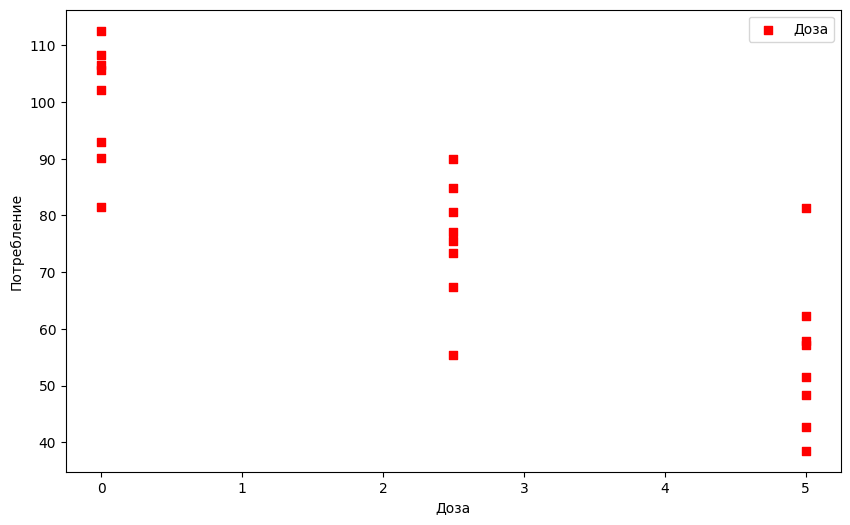

In [4]:
# ваш код
plt.scatter(x=final_df['Dose'], y=final_df['Consumpt'], c='r',marker='s',label='Доза')

plt.legend(loc=1)
plt.xlabel('Доза')
plt.ylabel('Потребление')
plt.show()

**Ваш ответ:**

Наблюдение:
по графику видно, что с уменьешением дозы потребление сокращается

In [5]:
dose_consump_ols = sm.ols(formula="Consumpt ~ Dose", data=final_df).fit()
dose_consump_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Consumpt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           7.27e-08
Time:                        10:56:15   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
Dose          -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R² =	0.739 или 73,9%. Это значит, что модель описывает 73,9% случаев. При этом значение F-критерия=	62.41, что говорит о том, что корелляции между переменными Доза- Потребление нет.

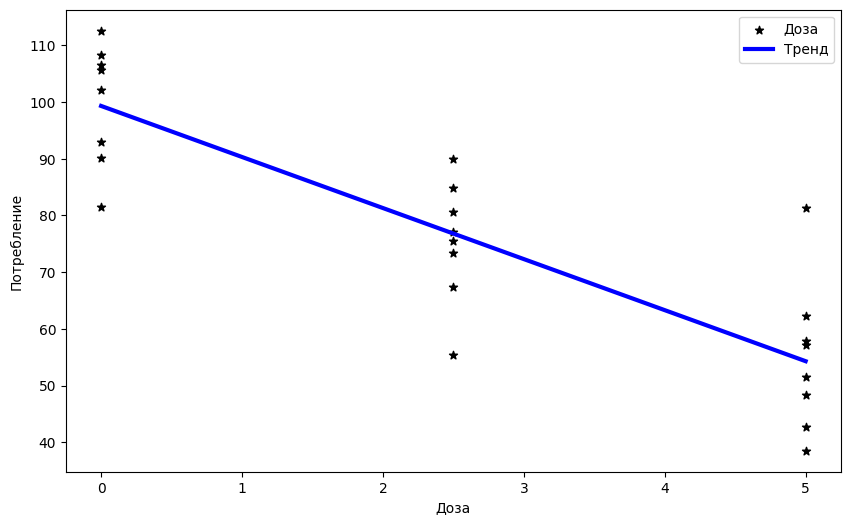

In [6]:
#Линия тренда
plt.scatter(x=final_df['Dose'], y=final_df['Consumpt'],c='k',marker='*',label='Доза')
plt.plot(final_df['Dose'],dose_consump_ols.predict(),color='blue',linewidth=3,label='Тренд')
plt.xlabel('Доза')
plt.ylabel('Потребление')
plt.legend()
plt.show()

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



**Решение:**
Для того, чтобы высчитать остатки необходимо из фактического значения вычесть предсказанное. Поэтому создаю столбец 'predict' и 'ostatok'

In [7]:
df2=final_df
df2['predict'] = dose_consump_ols.predict()
df2['ostatok']=final_df['Consumpt']-df2['predict']
df2

,Dose,Consumpt,predict,ostatok
0,0.0,112.6,99.33125,13.26875
1,0.0,102.1,99.33125,2.76875
2,0.0,90.2,99.33125,-9.13125
3,0.0,81.5,99.33125,-17.83125
4,0.0,105.6,99.33125,6.26875
5,0.0,93.0,99.33125,-6.33125
6,0.0,106.6,99.33125,7.26875
7,0.0,108.3,99.33125,8.96875
8,2.5,73.3,76.81250,-3.51250
9,2.5,84.8,76.81250,7.98750


**Ваш ответ:**
Далее строю график нормальной вероятностный график остатков с помощью моделей
scipy

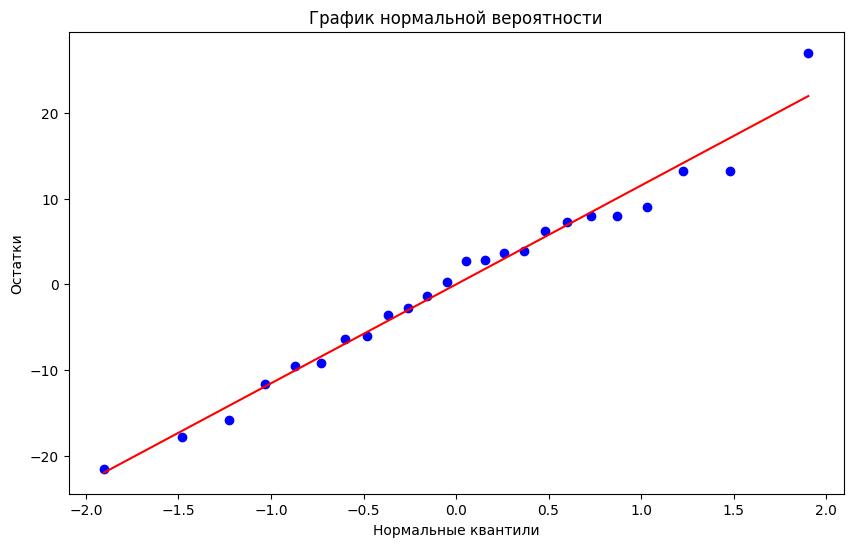

In [31]:
from scipy.stats import norm
from scipy.stats import probplot

probplot(df2['ostatok'], plot=plt)
plt.title("График нормальной вероятности")
plt.xlabel("Нормальные квантили")
plt.ylabel("Остатки")
plt.show()

**Итог:**
Большая часть данных подчиняется нормальному распределению, поэтому можно сделать предположение, что и все распределение также приблизительно нормальное.